
load dataset


In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import nibabel as nib
import gzip

In [2]:
from google.colab import drive 

### Effusions nii
подгружаем файл с google.drive

In [3]:
drive.mount('/content/drive')
file_zip = '/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/PleThora Effusions June 2020.zip' 

Mounted at /content/drive


In [4]:

# Функция распаковывает архив zip, проходит по внутренним папкам, и схораняет наименования и пути к архивам gz в словаре dict_idя

def dict_gz (zip_path, folder_path):
  """
  zip_path - путь к архиву zip
  folder_path - наименование папки с папками 
  """

  dict_id = {} 
  # Распаковываем архив zip
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall()

  # Открываем папку folder_path
  folder_path = os.path.join(os.getcwd(), folder_path)
  for root, dirs, files in os.walk(folder_path):
      for file in files:  # проходим по файлам в папке
          if file.endswith('effusion_first_reviewer.nii.gz'):
              # Записываем в словарь архив gz
              dict_id[file[:9]] = os.path.join(root, file)

  return dict_id

In [5]:
# распаковываем архив (с помощью фунции выше) и делаем словарь с путями к архивам gz

dict_mask_fr = dict_gz (zip_path = file_zip, 
                             folder_path = 'Effusions')

In [6]:
dict_mask_fr 

# sorted(dict_mask_fr .items()) # отсортированные значения

{'LUNG1-296': '/content/Effusions/LUNG1-296/LUNG1-296_effusion_first_reviewer.nii.gz',
 'LUNG1-377': '/content/Effusions/LUNG1-377/LUNG1-377_effusion_first_reviewer.nii.gz',
 'LUNG1-381': '/content/Effusions/LUNG1-381/LUNG1-381_effusion_first_reviewer.nii.gz',
 'LUNG1-060': '/content/Effusions/LUNG1-060/LUNG1-060_effusion_first_reviewer.nii.gz',
 'LUNG1-301': '/content/Effusions/LUNG1-301/LUNG1-301_effusion_first_reviewer.nii.gz',
 'LUNG1-325': '/content/Effusions/LUNG1-325/LUNG1-325_effusion_first_reviewer.nii.gz',
 'LUNG1-348': '/content/Effusions/LUNG1-348/LUNG1-348_effusion_first_reviewer.nii.gz',
 'LUNG1-195': '/content/Effusions/LUNG1-195/LUNG1-195_effusion_first_reviewer.nii.gz',
 'LUNG1-091': '/content/Effusions/LUNG1-091/LUNG1-091_effusion_first_reviewer.nii.gz',
 'LUNG1-149': '/content/Effusions/LUNG1-149/LUNG1-149_effusion_first_reviewer.nii.gz',
 'LUNG1-340': '/content/Effusions/LUNG1-340/LUNG1-340_effusion_first_reviewer.nii.gz',
 'LUNG1-001': '/content/Effusions/LUNG1-001

###### метаданные картинки (1 ex)

-`img.get_data()` возвращает данные изображения в виде массива numpy, который может быть использован для анализа и обработки изображения. Однако, если изображение содержит метаданные (например, информацию о позиции или направлении), эти данные не будут включены в массив.

-`img.get_fdata()` возвращает данные изображения в виде массива numpy с плавающей точкой, что может быть полезно при анализе медицинских изображений. Эта функция также включает метаданные в массив, что позволяет сохранить всю информацию об изображении.

In [ ]:
# выберем пациента
example  = "LUNG1-001"

In [ ]:

with gzip.open(dict_mask_fr[example], 'rb') as f_in:
  img = nib.load(dict_mask_fr[example])
  # получение метаданных
  hdr = img.header

  # вывод метаданных
  print('Размеры изображения:', img.shape)
  print('Размеры изображения:', hdr.get_data_shape())
  print('Размеры в пикселях:', hdr.get_zooms())
  print('Формат данных:', hdr.get_data_dtype())
  print('Количество измерений:', hdr['dim'][0])
  print('Размерности измерений:', hdr['dim'][1:])
  print('Количество томограмм:', hdr['dim'][4])
  print('Размеры в миллиметрах:', hdr.get_zooms()[:3])
  print('Описание:', hdr.get('descrip', ''))
  

Размеры изображения: (512, 512, 134)
Размеры изображения: (512, 512, 134)
Размеры в пикселях: (0.9765625, 0.9765625, 3.0)
Формат данных: uint16
Количество измерений: 3
Размерности измерений: [512 512 134   1   1   1   1]
Количество томограмм: 1
Размеры в миллиметрах: (0.9765625, 0.9765625, 3.0)
Описание: b''


###### проверка размерностей

In [ ]:
# проверим размеры картинок
images_size = []

# читаем содержимое архивов gz и смотрим разммерности картинок
for example_gz in list(dict_mask_fr.values()):  # Выбираем нужный архив для распаковки и чтения файла nii
  with gzip.open(example_gz, 'rb') as f_in:
    img = nib.load(example_gz)
    data = img.get_fdata()
    images_size.append(f'{data.shape[:2]}')


set(images_size)


{'(512, 512)'}

In [ ]:
# # проверим кол-во срезов по папкам

gz_images_slice = {}

for name_example_gz in list(dict_mask_fr.keys()): 
    with gzip.open(dict_mask_fr[name_example_gz],'rb') as f_in:
      img = nib.load(dict_mask_fr[name_example_gz])
      gz_images_slice[ name_example_gz] = img.shape[2]

# # проверим кол-во срезов по папкам
print('\nкол-во пациентов:', len(list(gz_images_slice.keys())))
print('max кол-во срезов в nii:', max(list(gz_images_slice.values())))
print('min кол-во срезов в nii:', min(list(gz_images_slice.values())))

# кол-во пациентов: 402
# max срезов в dcm: 297
# min срезов в dcm: 75


кол-во пациентов: 78
max кол-во срезов в dcm: 297
min кол-во срезов в dcm: 82


In [ ]:
pd.DataFrame([list(gz_images_slice.keys()),
              list(gz_images_slice.values())]).T.rename(columns = {0: 'name_pictures', 1:'slice'}).to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/count_slice_gz.csv', index = False)

###### отрисовка 2д ( 1 ex)

In [ ]:
# выберем пациента
example  = "LUNG1-001"

<ipython-input-12-963713127e72>:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = img.get_data()


архив: /content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz
№ среза 0


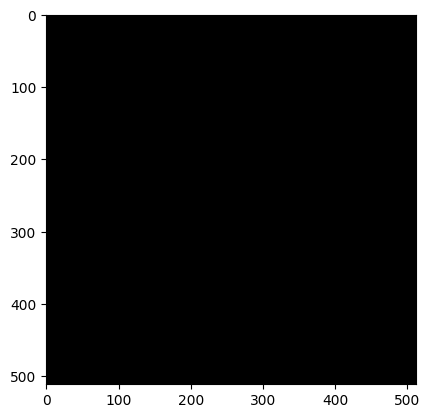

№ среза 1


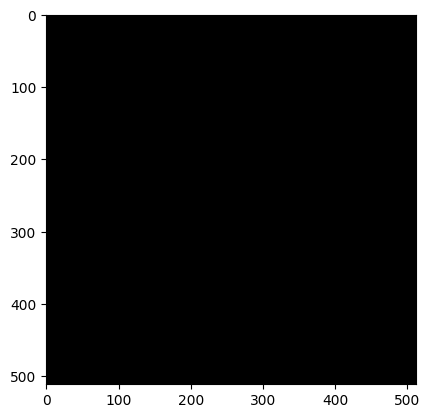

№ среза 2


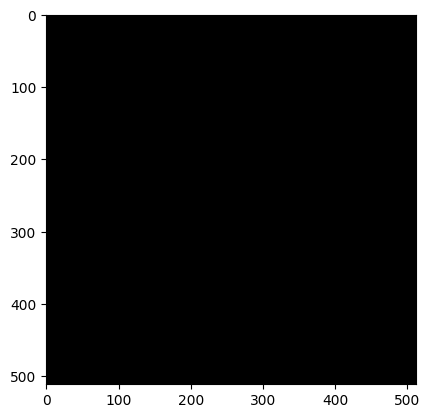

№ среза 3


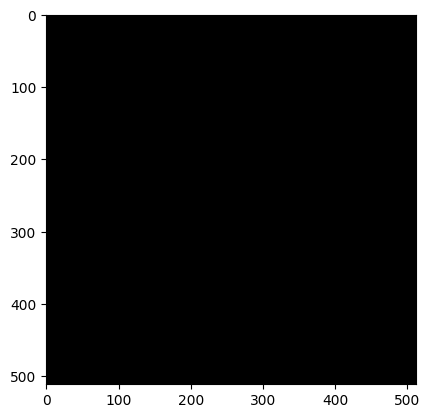

№ среза 4


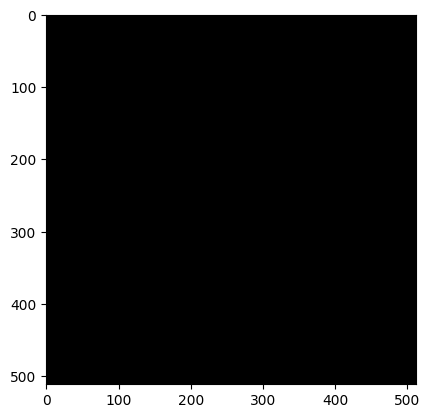

№ среза 5


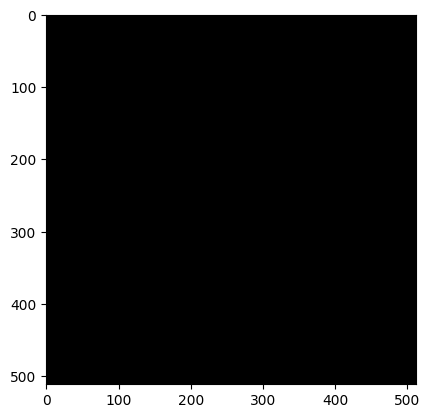

№ среза 6


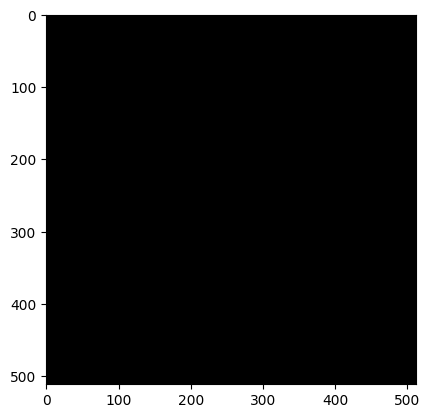

№ среза 7


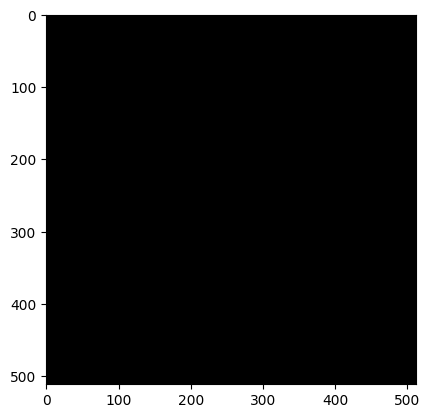

№ среза 8


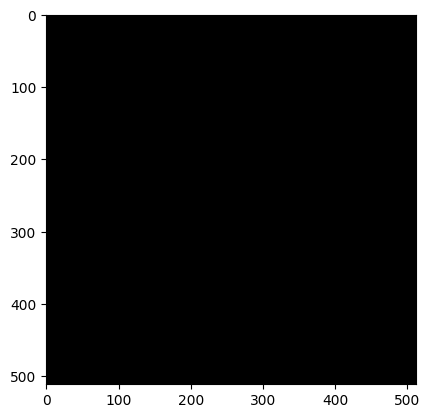

№ среза 9


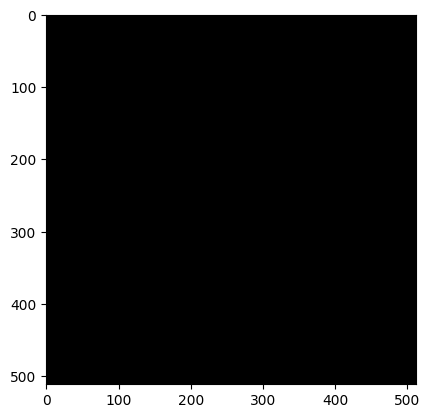

№ среза 10


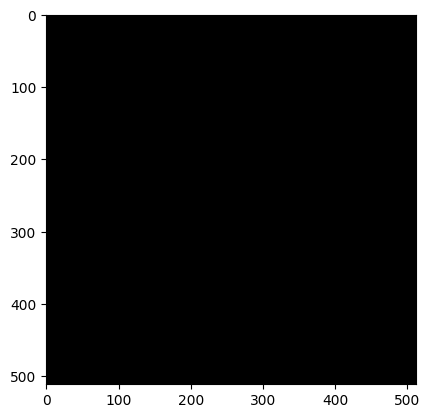

№ среза 11


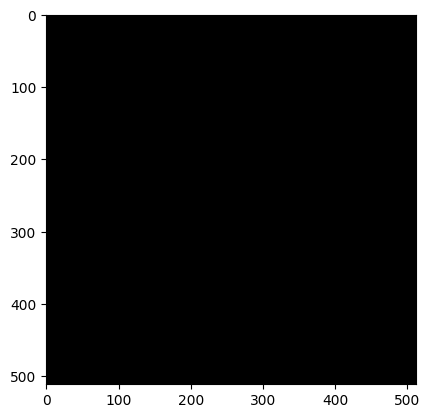

№ среза 12


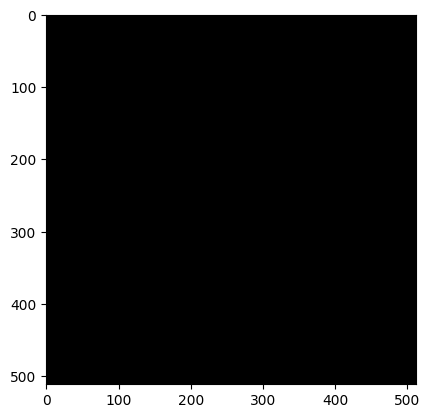

№ среза 13


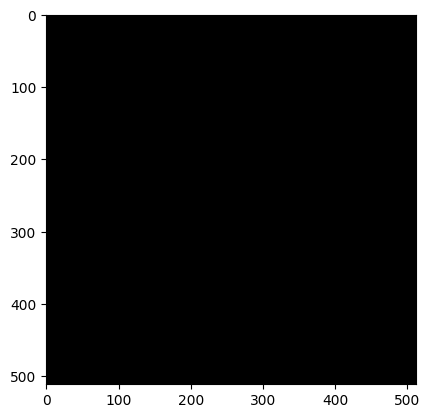

№ среза 14


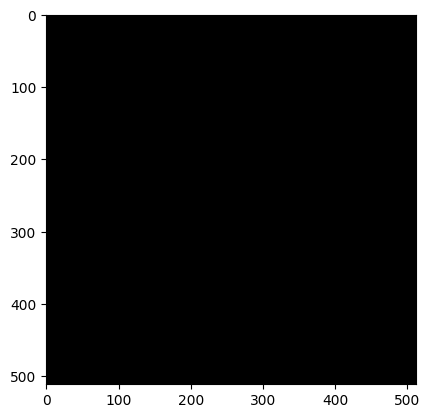

№ среза 15


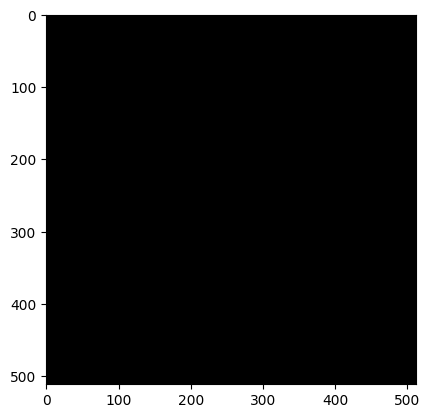

№ среза 16


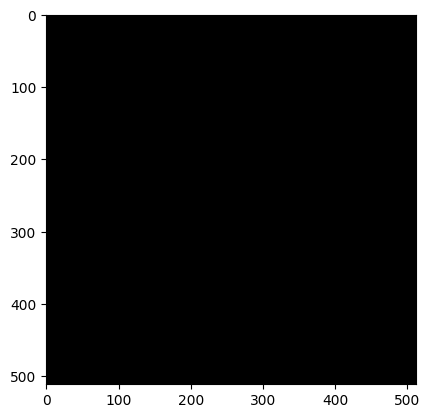

№ среза 17


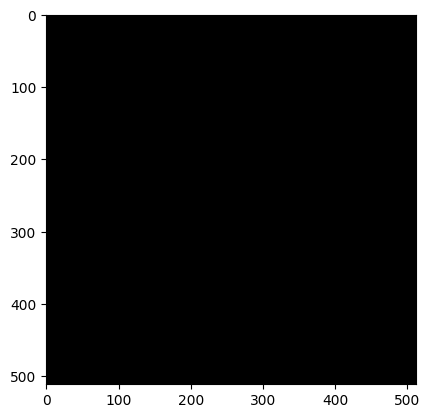

№ среза 18


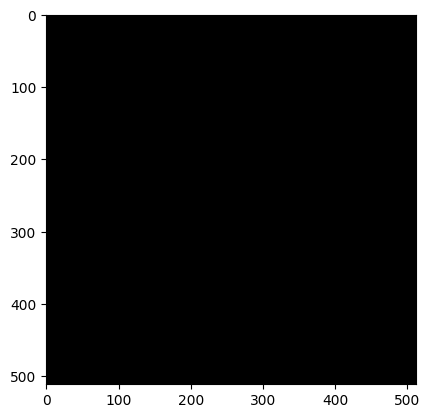

№ среза 19


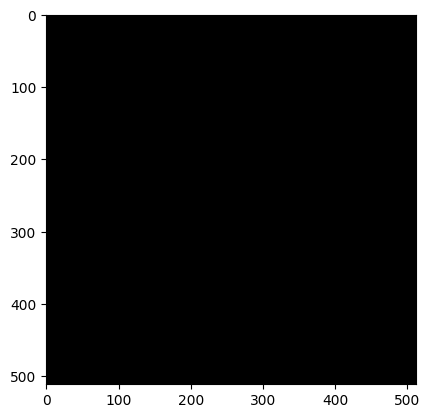

№ среза 20


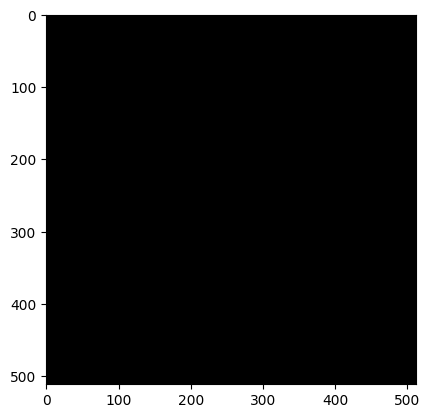

№ среза 21


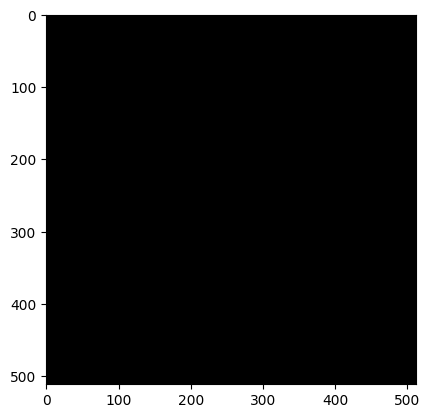

№ среза 22


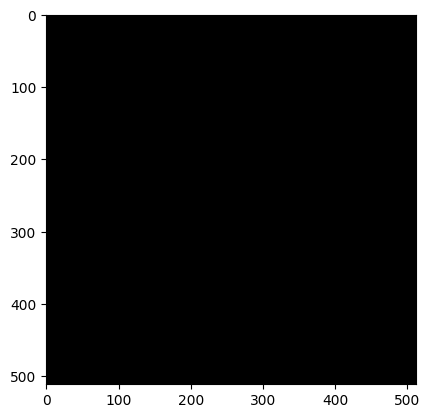

№ среза 23


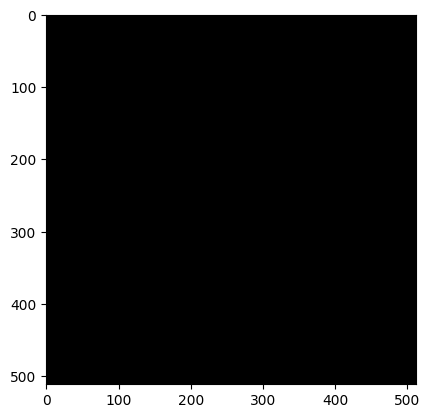

№ среза 24


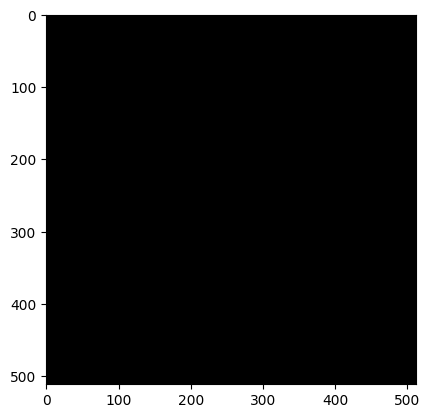

№ среза 25


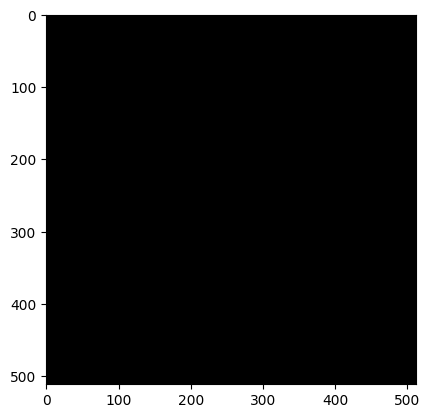

№ среза 26


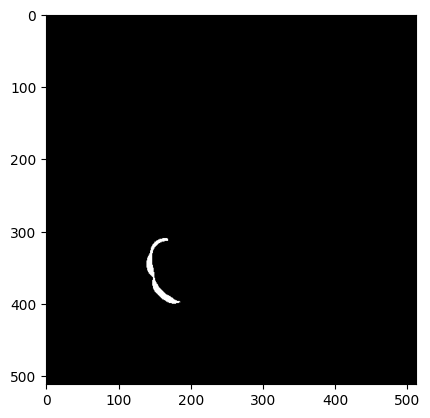

№ среза 27


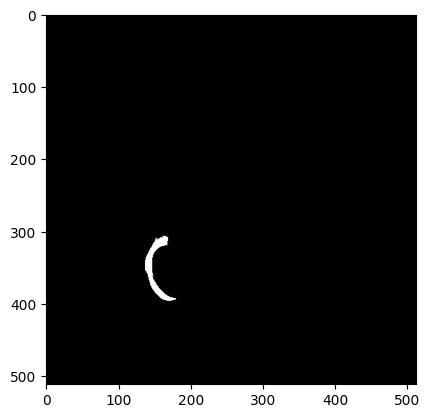

№ среза 28


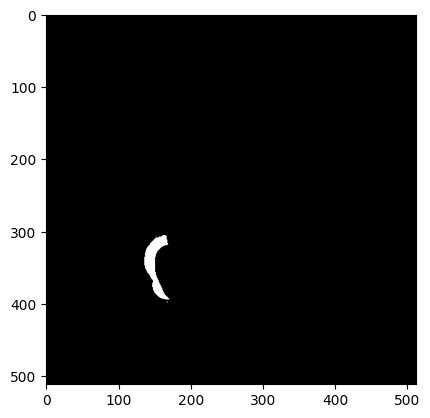

№ среза 29


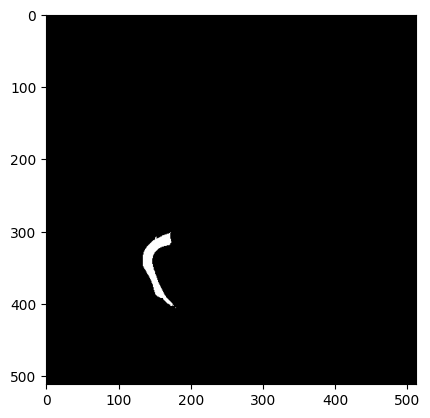

№ среза 30


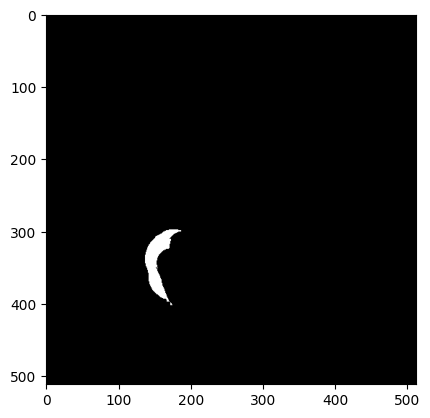

№ среза 31


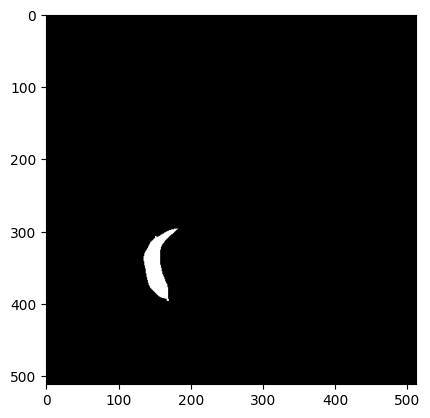

№ среза 32


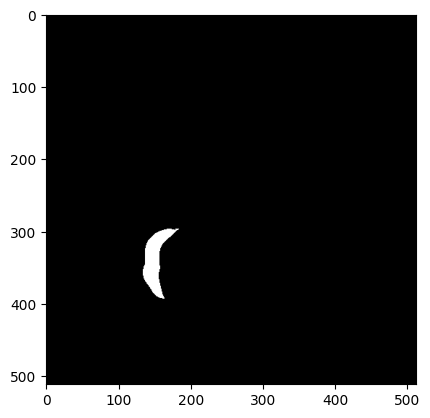

№ среза 33


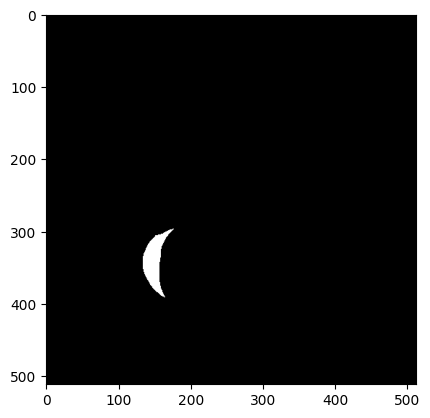

№ среза 34


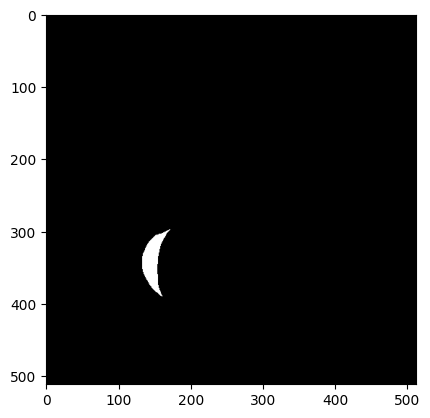

№ среза 35


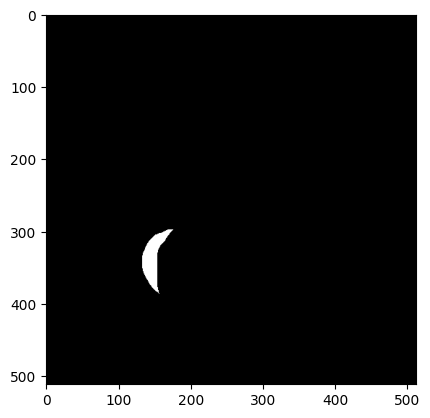

№ среза 36


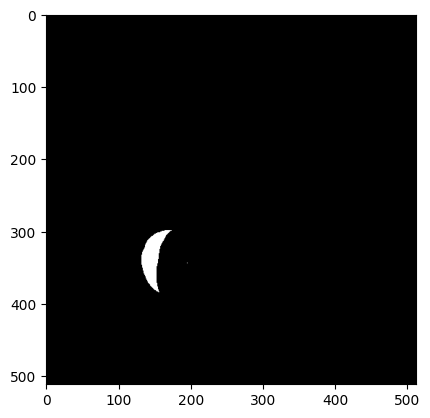

№ среза 37


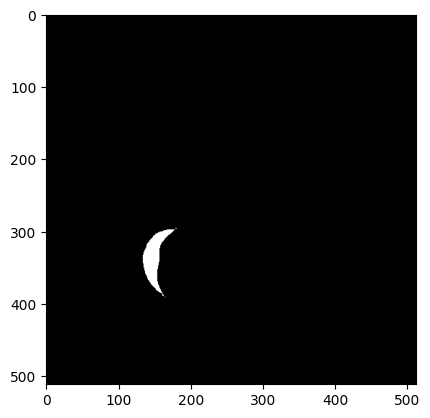

№ среза 38


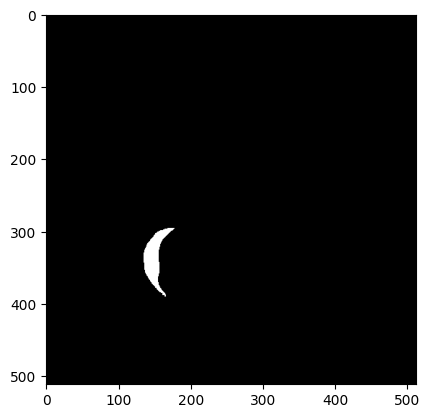

№ среза 39


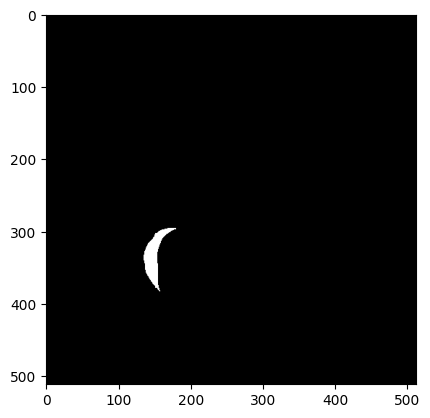

№ среза 40


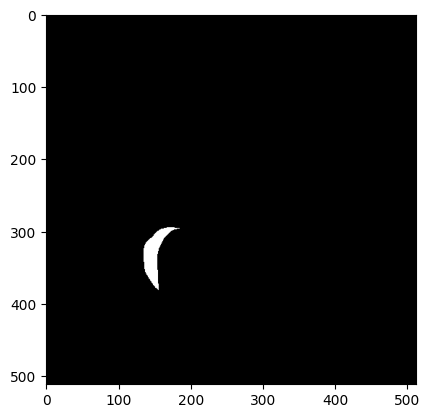

№ среза 41


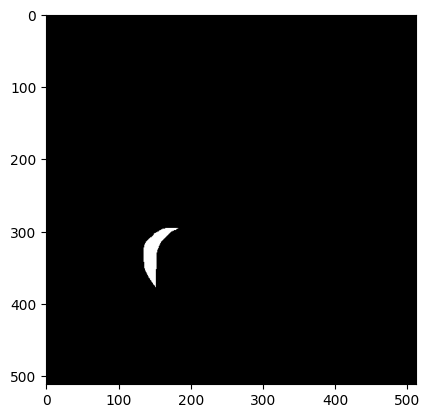

№ среза 42


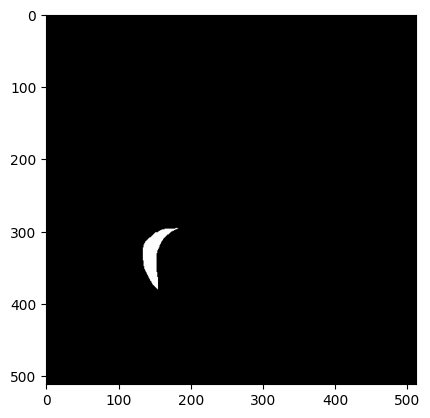

№ среза 43


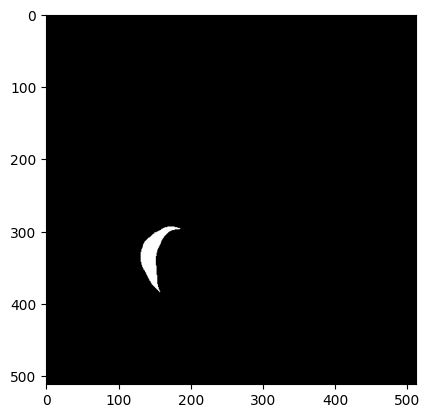

№ среза 44


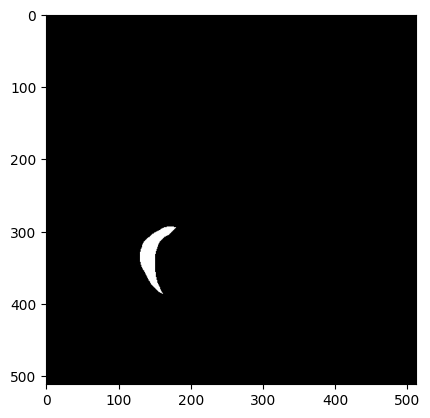

№ среза 45


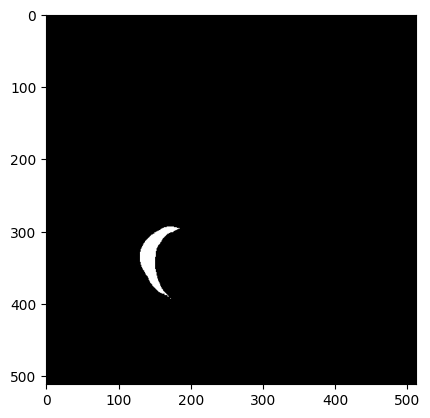

№ среза 46


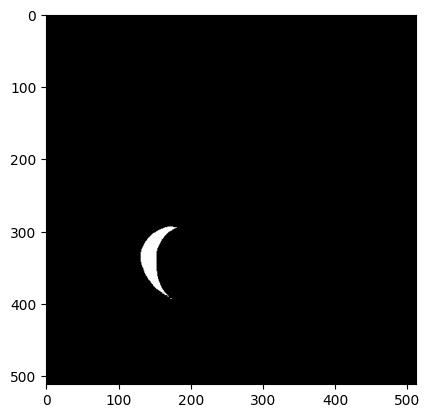

№ среза 47


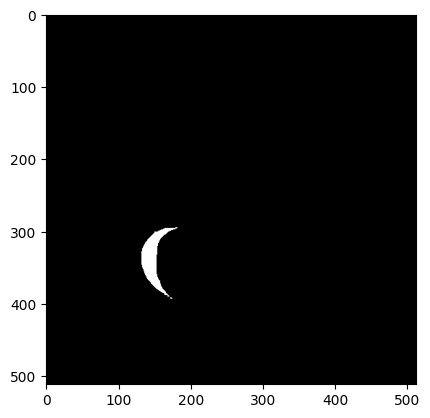

№ среза 48


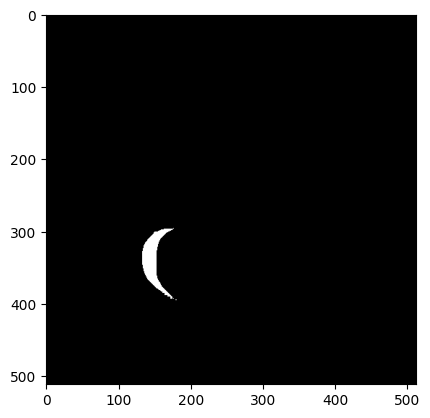

№ среза 49


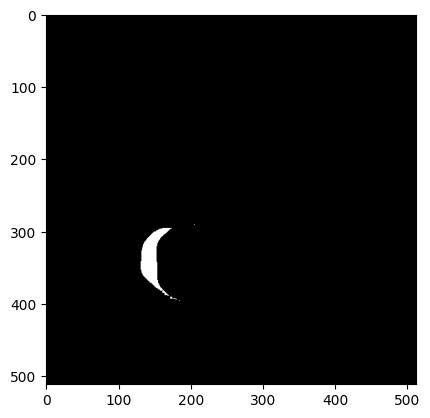

№ среза 50


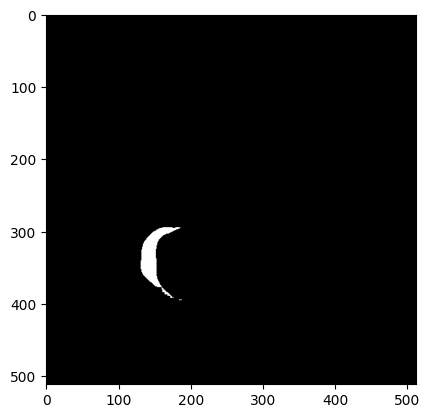

№ среза 51


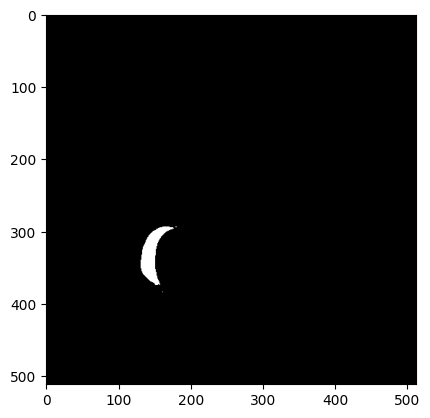

№ среза 52


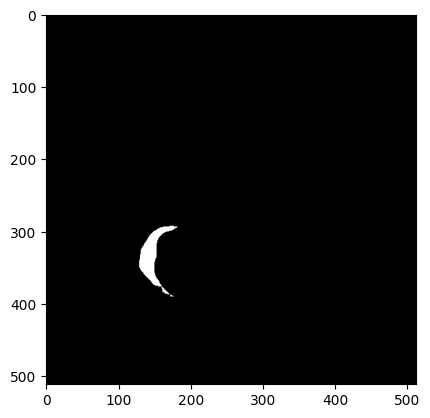

№ среза 53


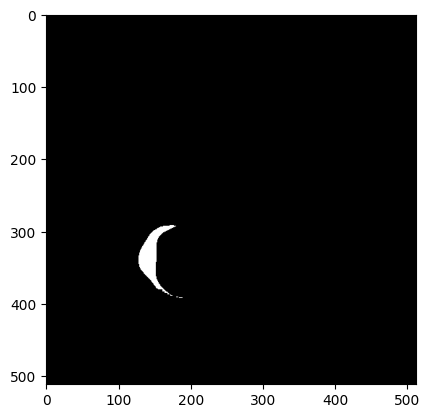

№ среза 54


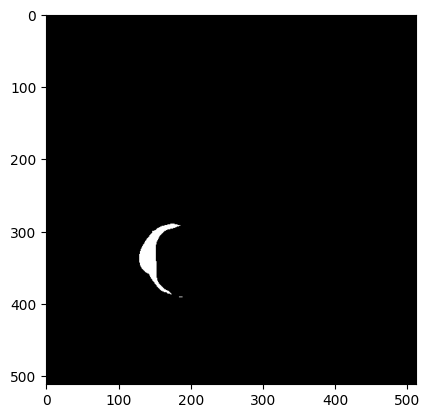

№ среза 55


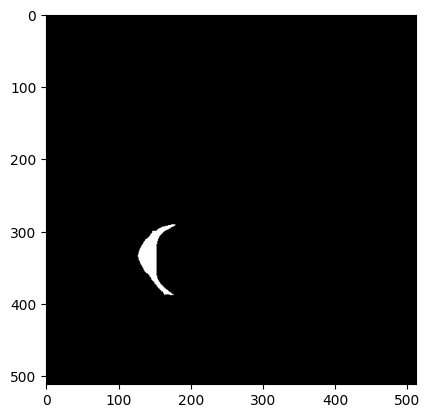

№ среза 56


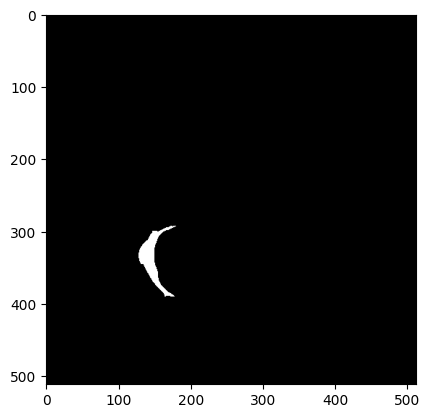

№ среза 57


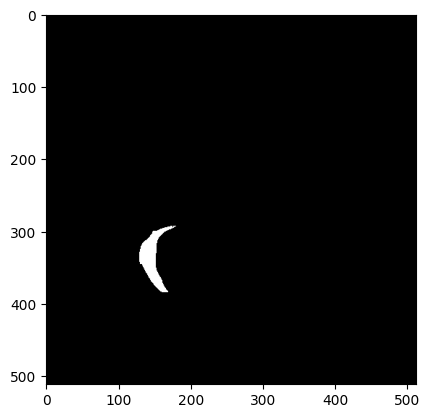

№ среза 58


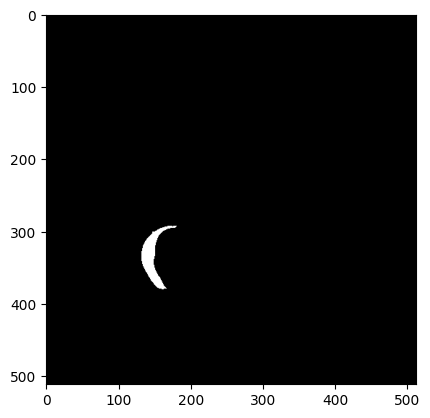

№ среза 59


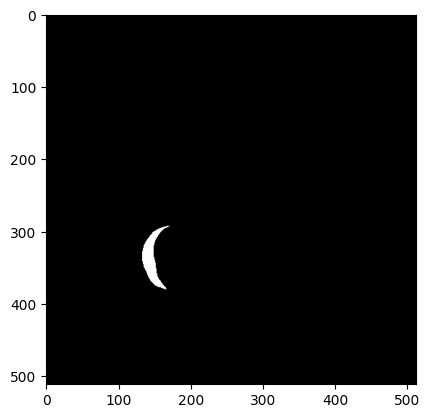

№ среза 60


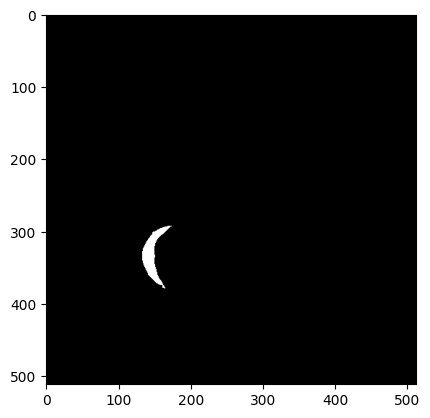

№ среза 61


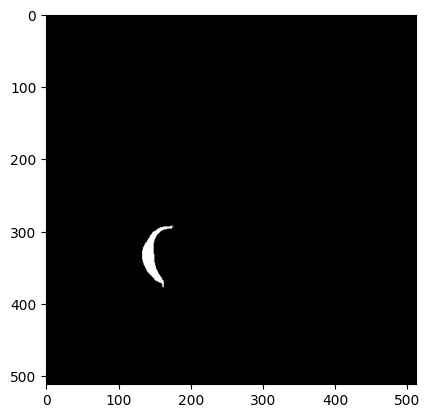

№ среза 62


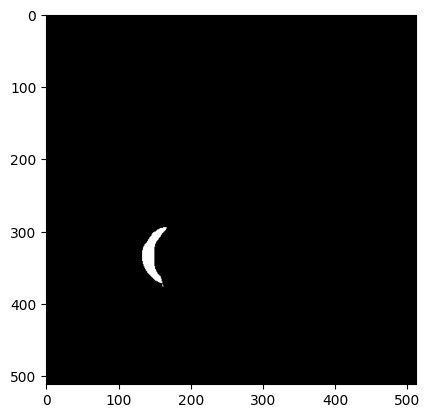

№ среза 63


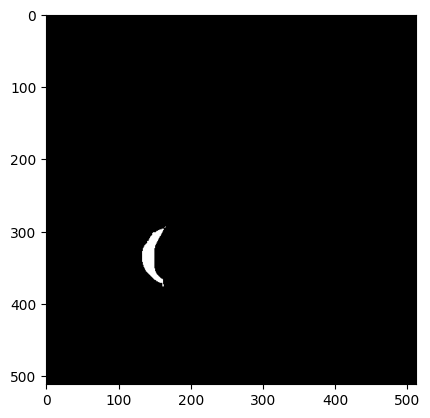

№ среза 64


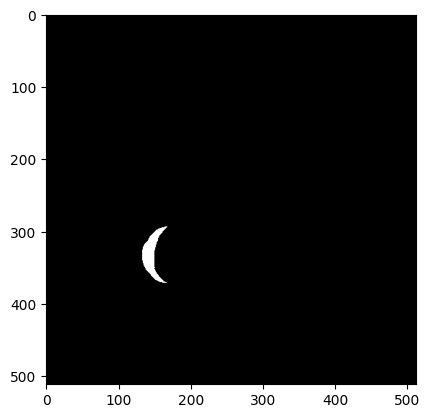

№ среза 65


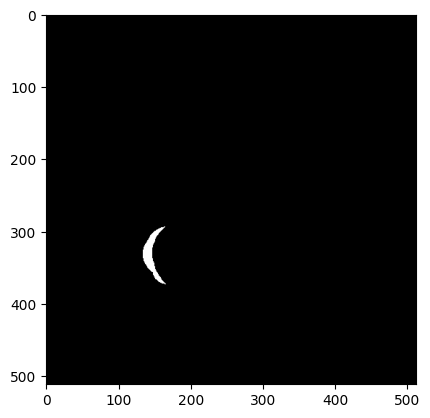

№ среза 66


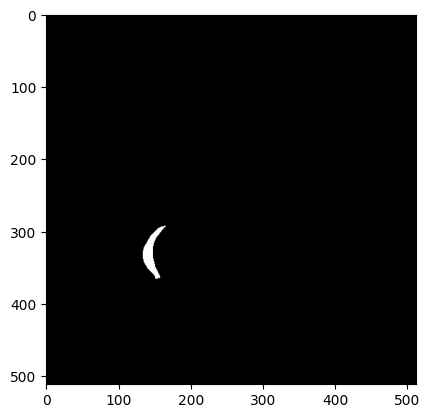

№ среза 67


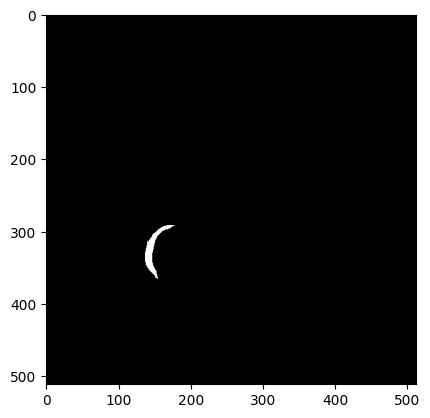

№ среза 68


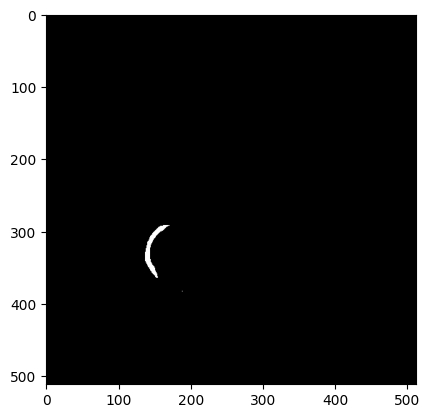

№ среза 69


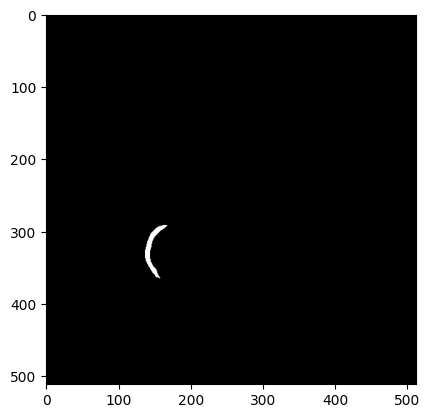

№ среза 70


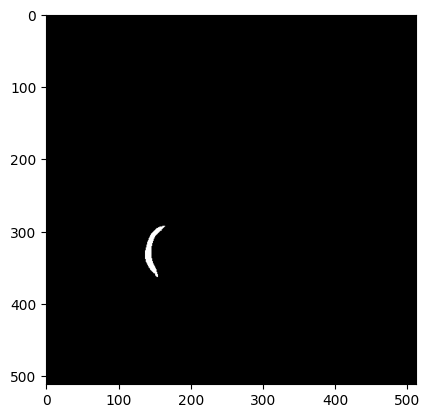

№ среза 71


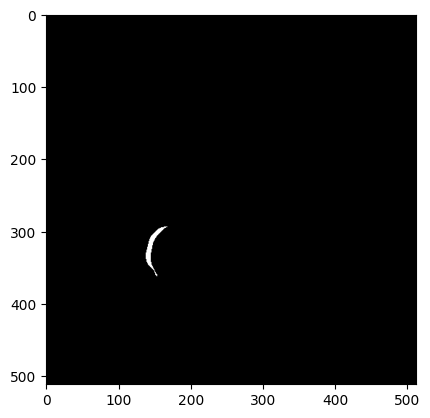

№ среза 72


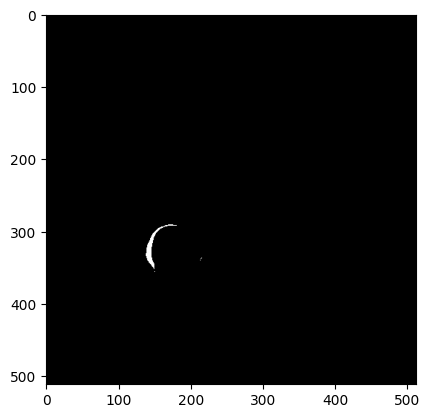

№ среза 73


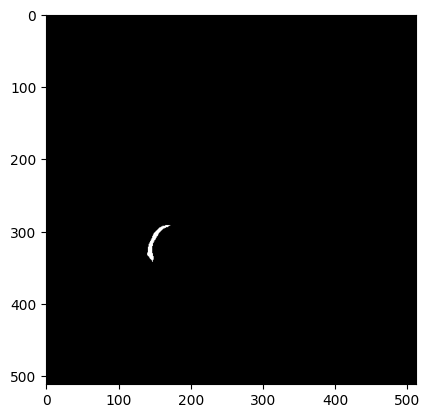

№ среза 74


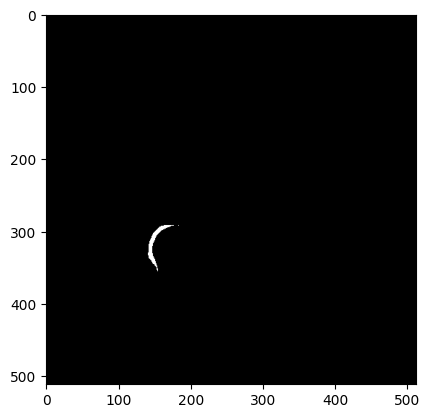

№ среза 75


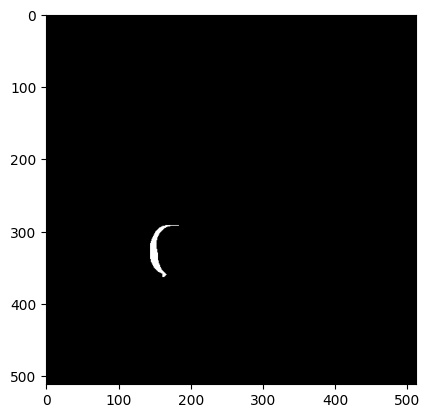

№ среза 76


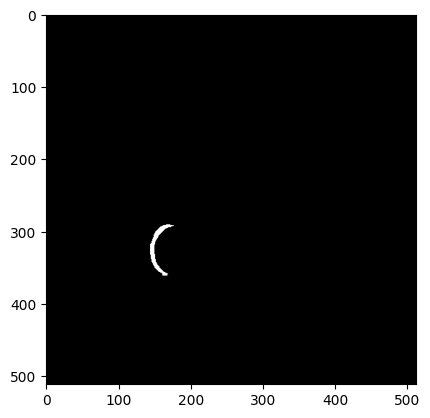

№ среза 77


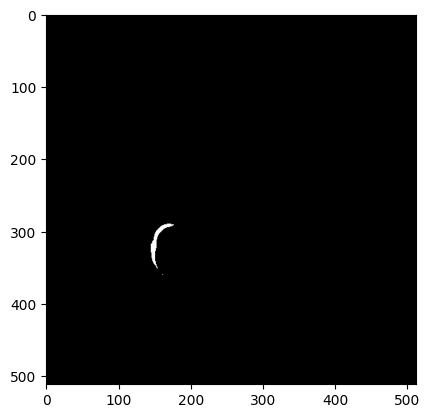

№ среза 78


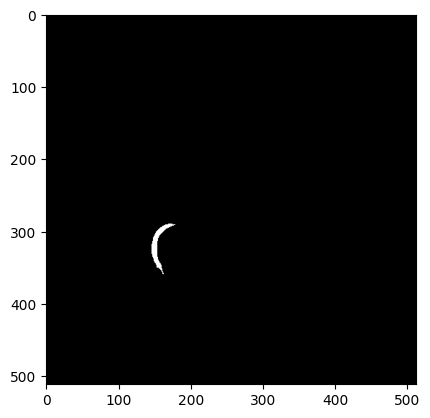

№ среза 79


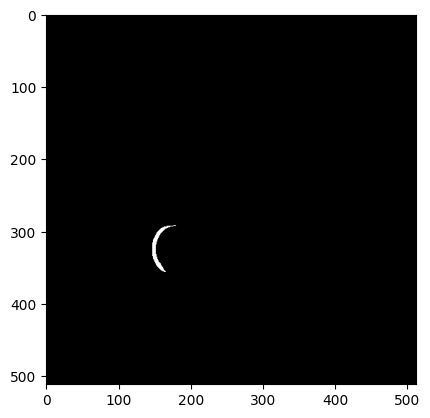

№ среза 80


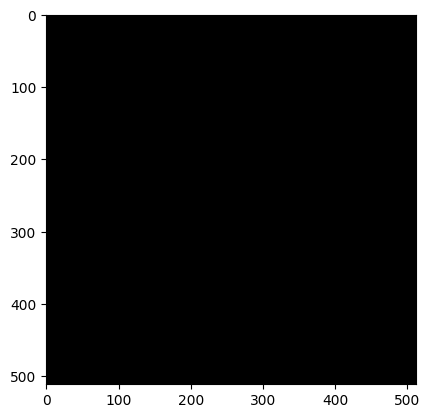

№ среза 81


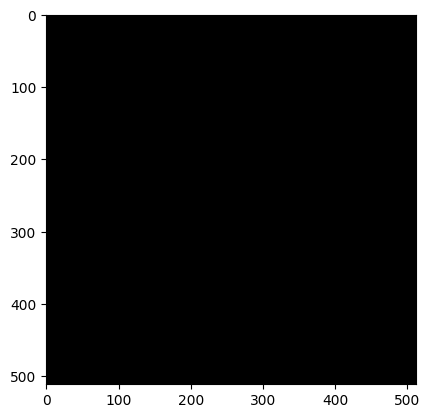

№ среза 82


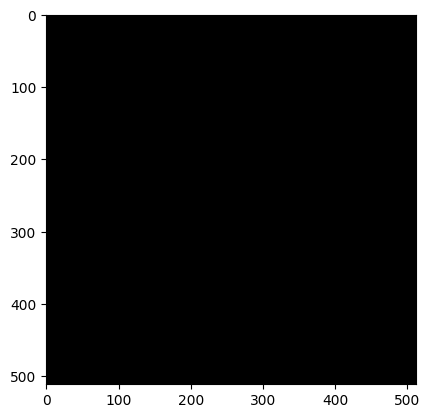

№ среза 83


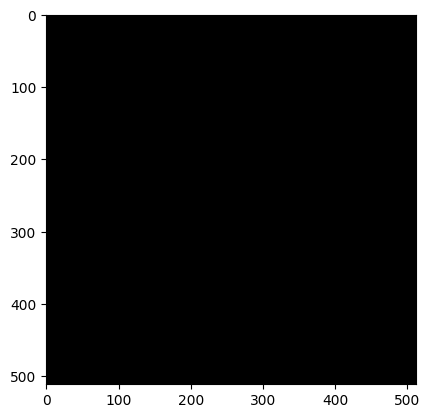

№ среза 84


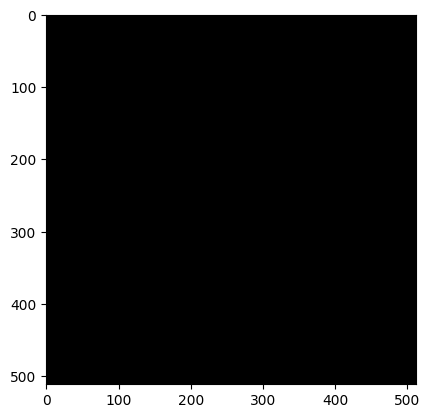

№ среза 85


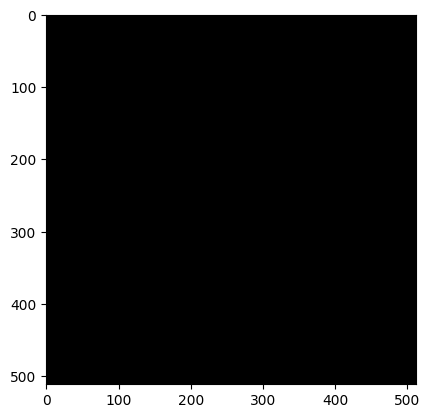

№ среза 86


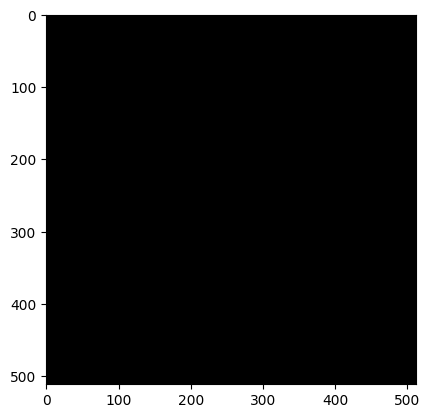

№ среза 87


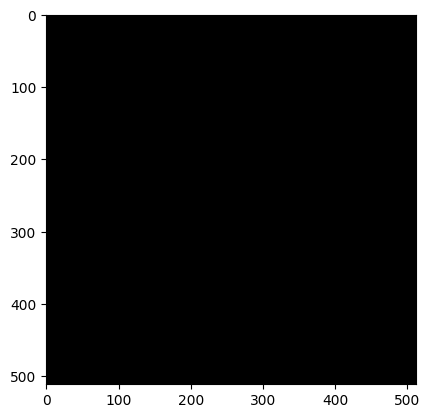

№ среза 88


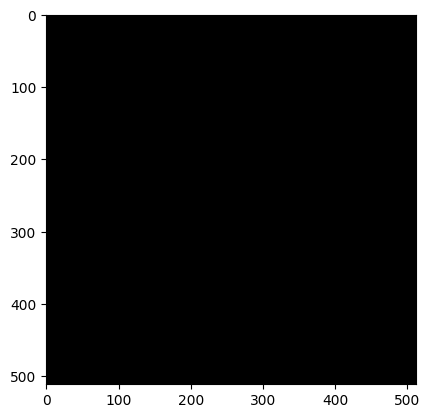

№ среза 89


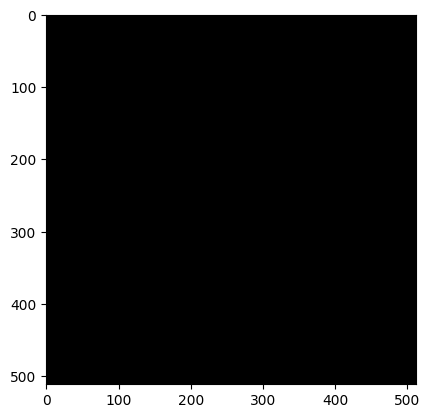

№ среза 90


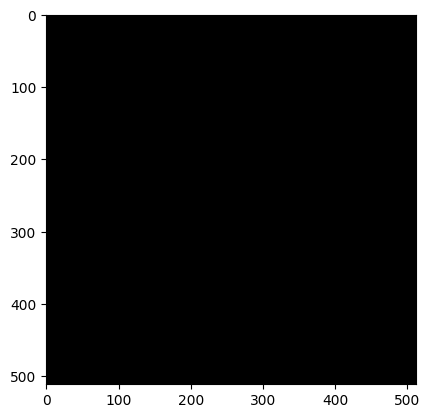

№ среза 91


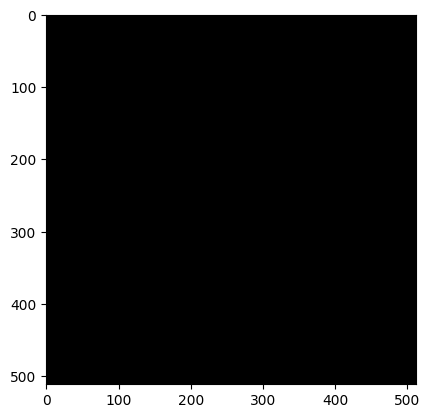

№ среза 92


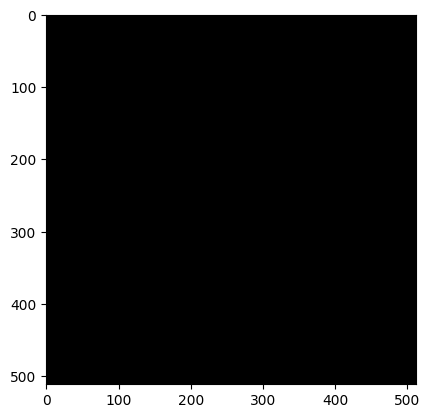

№ среза 93


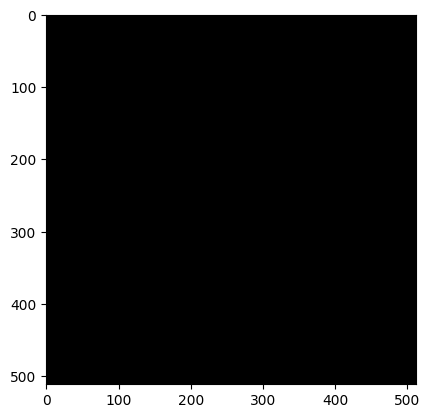

№ среза 94


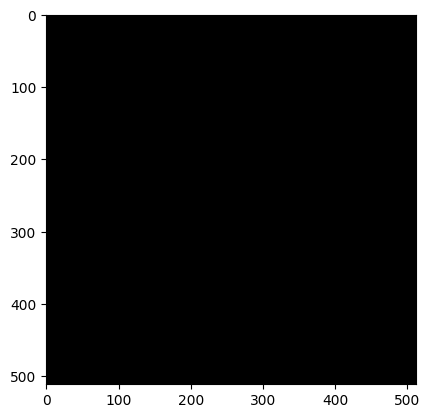

№ среза 95


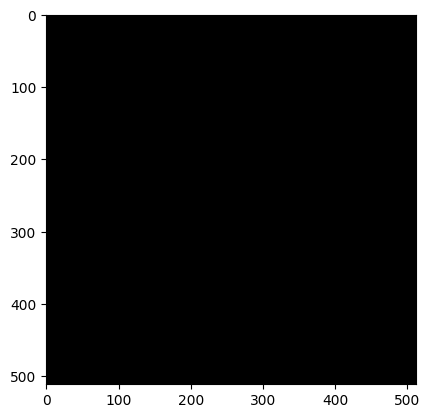

№ среза 96


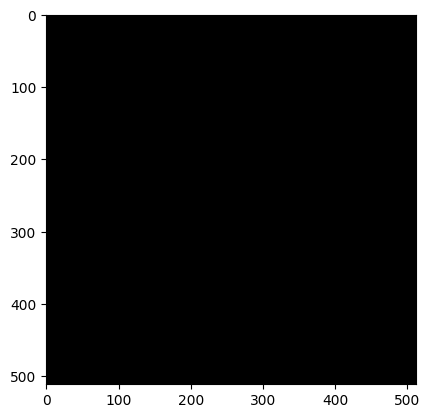

№ среза 97


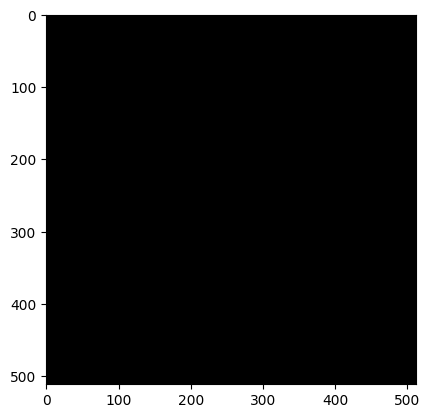

№ среза 98


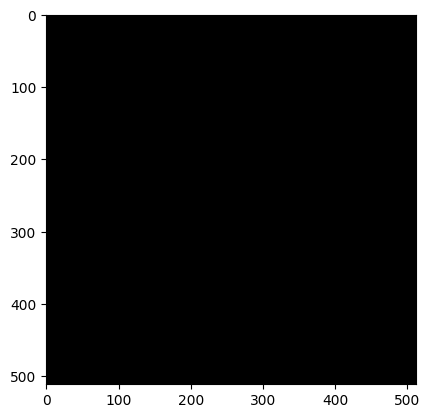

№ среза 99


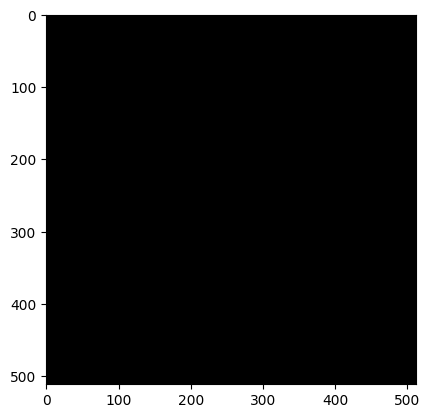

№ среза 100


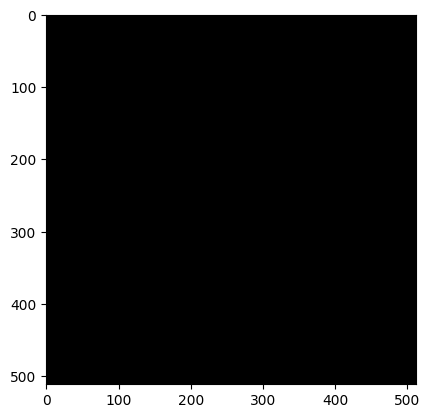

№ среза 101


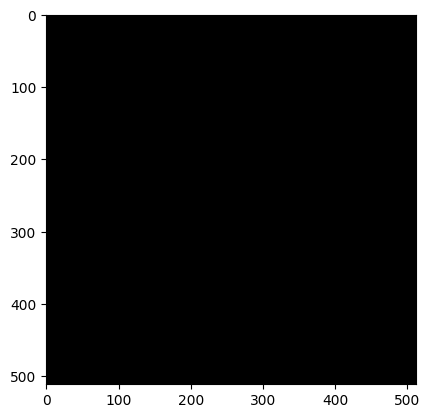

№ среза 102


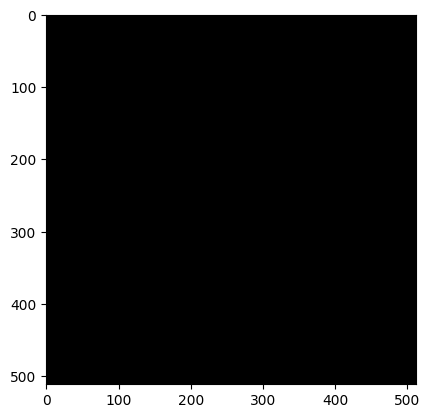

№ среза 103


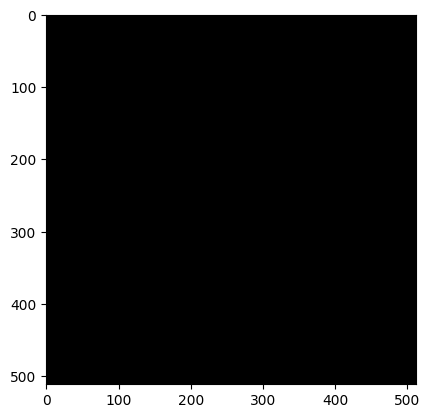

№ среза 104


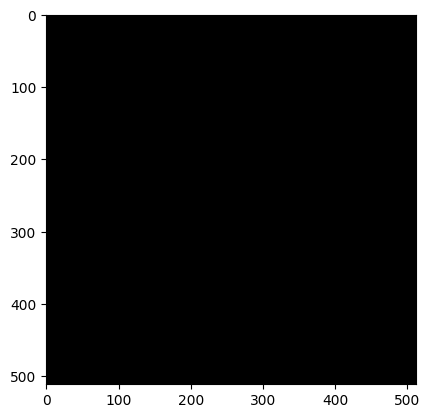

№ среза 105


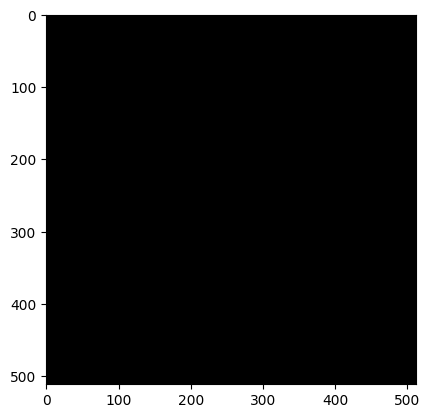

№ среза 106


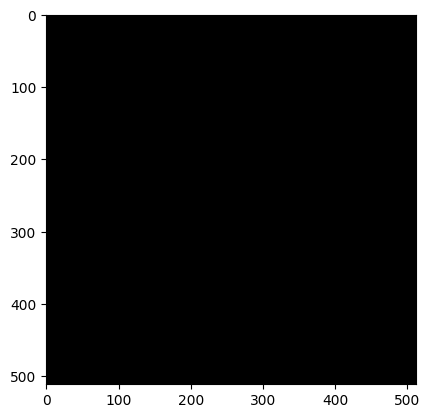

№ среза 107


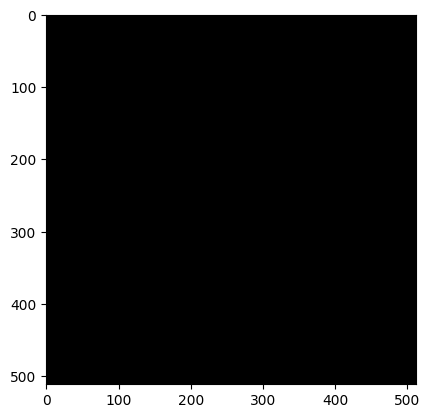

№ среза 108


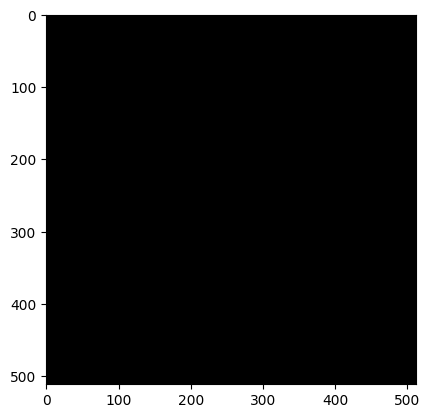

№ среза 109


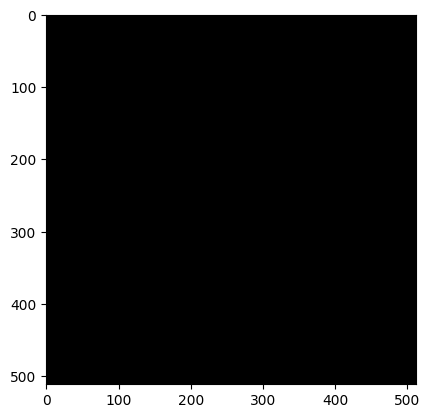

№ среза 110


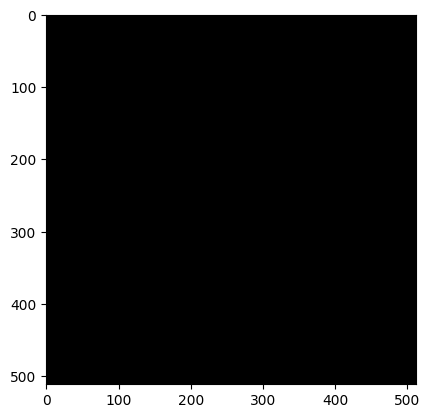

№ среза 111


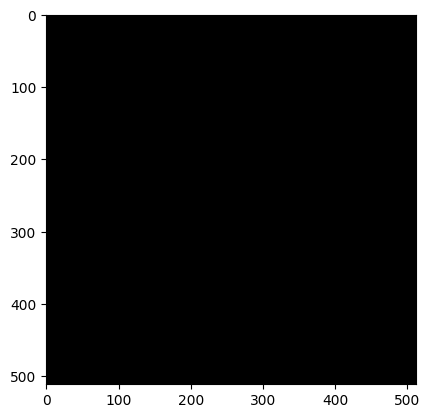

№ среза 112


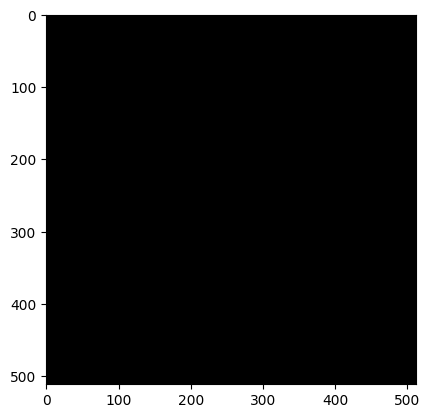

№ среза 113


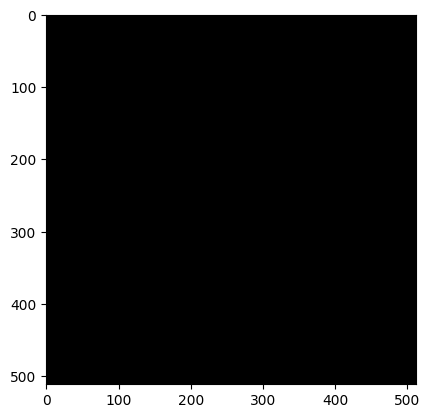

№ среза 114


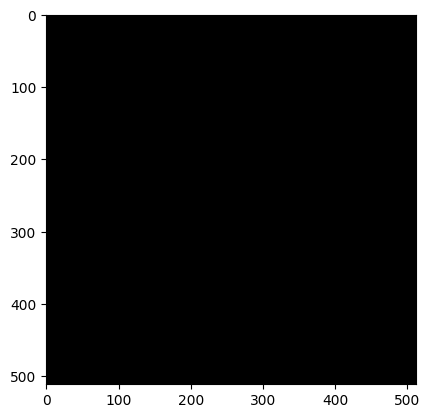

№ среза 115


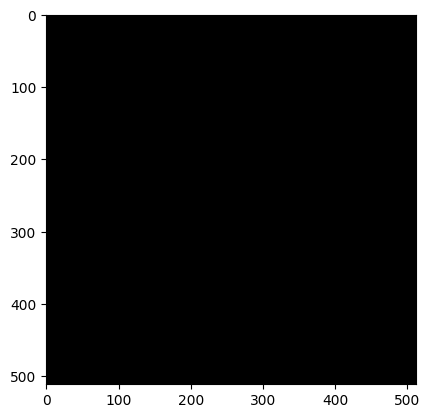

№ среза 116


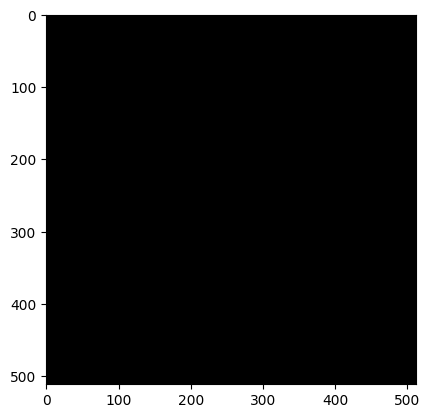

№ среза 117


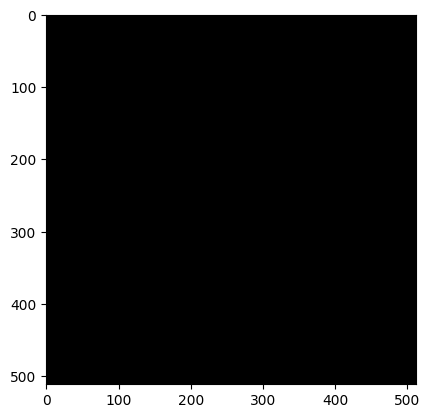

№ среза 118


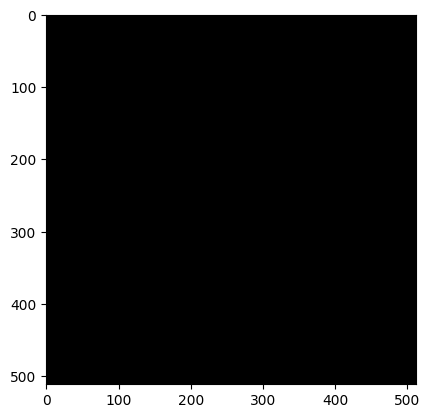

№ среза 119


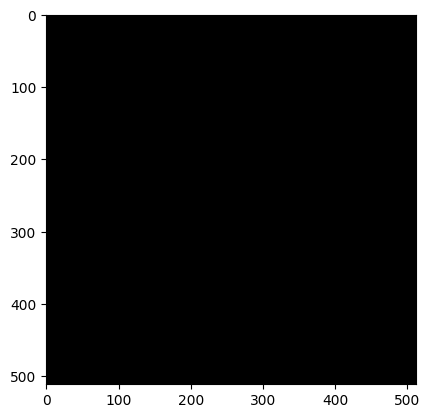

№ среза 120


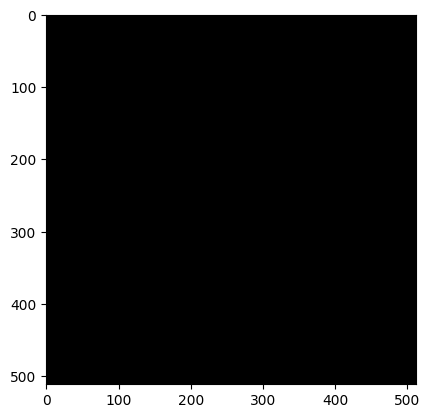

№ среза 121


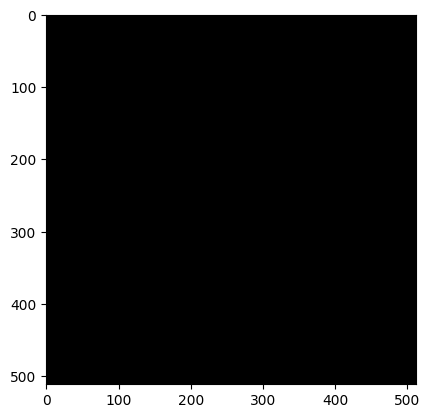

№ среза 122


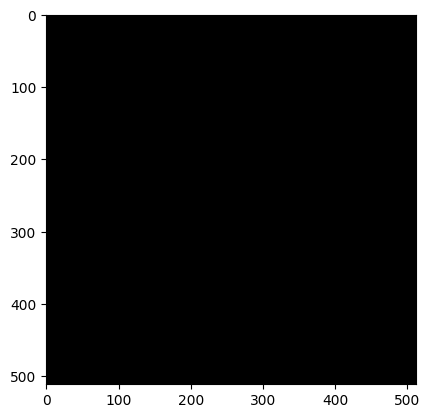

№ среза 123


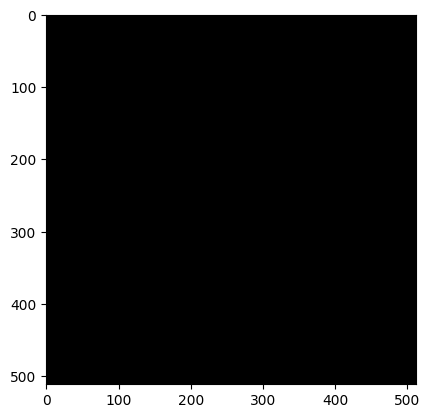

№ среза 124


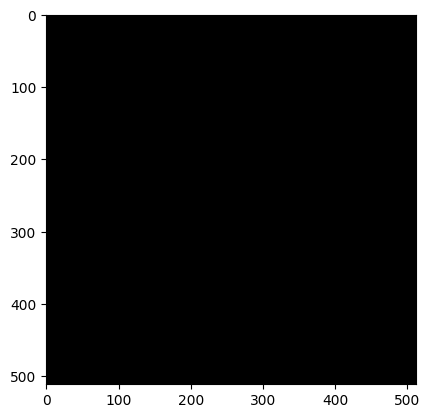

№ среза 125


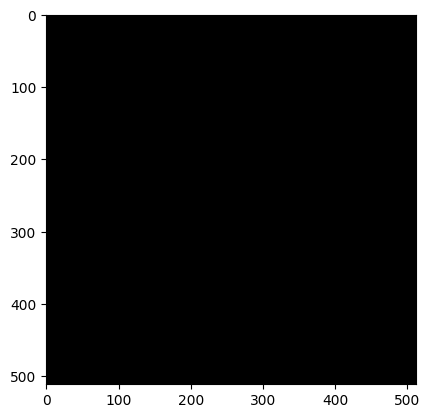

№ среза 126


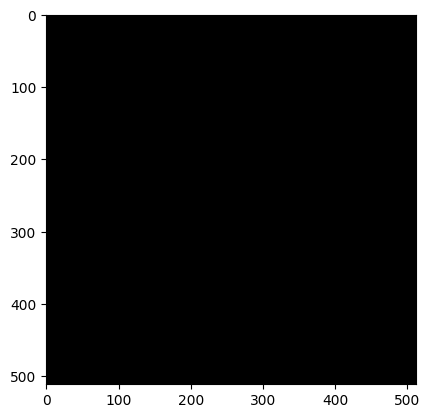

№ среза 127


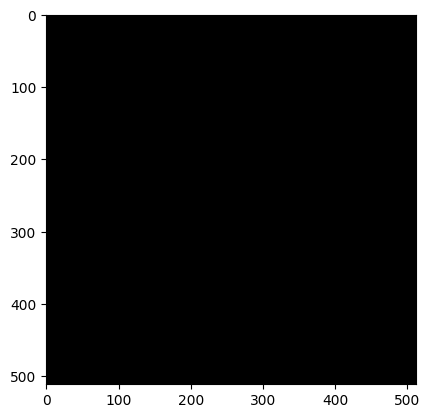

№ среза 128


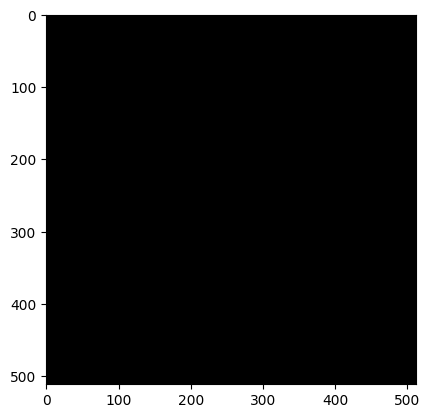

№ среза 129


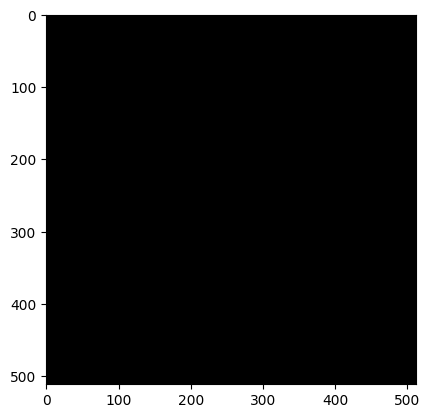

№ среза 130


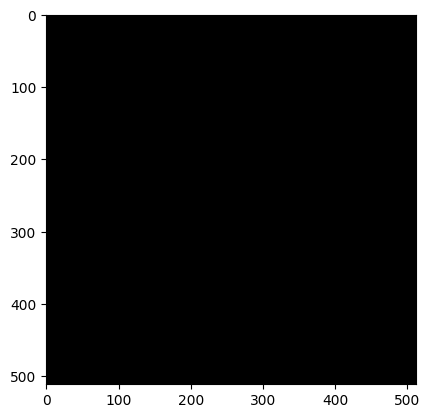

№ среза 131


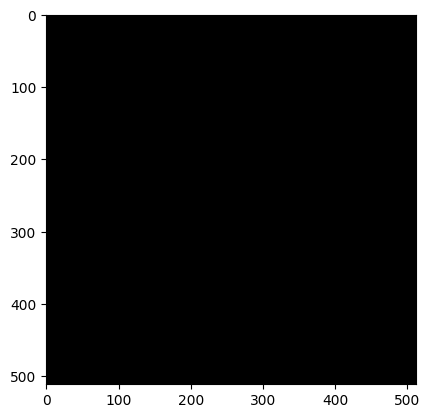

№ среза 132


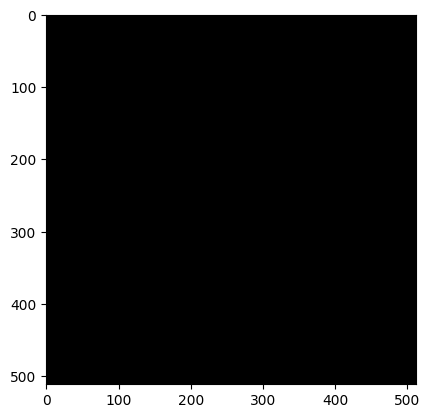

№ среза 133


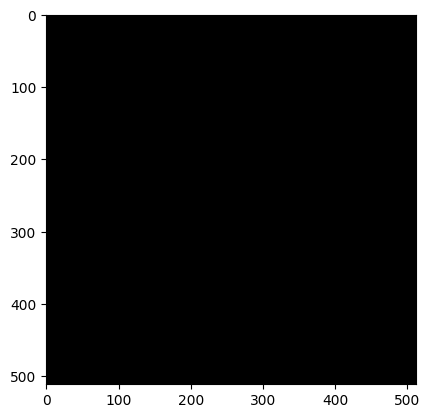

In [ ]:

# или читаем содержимое 1 архива gz и отображаем картинки

with gzip.open(dict_mask_fr[example], 'rb') as f_in:
  img = nib.load(dict_mask_fr[example])# читаем архив и файл из него
  data = img.get_data()

print(f'архив: {dict_mask_fr[example]}')
# отображение срезов изображений
for i in range(data.shape[-1] ):
    print(f'№ среза {i}')
    plt.imshow(data[:,:, i], cmap='gray')
    plt.show()


###### save 2d

In [15]:
# выберем папки пациентов с масками
example  = [
    'LUNG1-001', 'LUNG1-002', 'LUNG1-005', 'LUNG1-008', 'LUNG1-013',
       'LUNG1-016', 'LUNG1-018', 'LUNG1-024', 'LUNG1-026', 'LUNG1-028',
       'LUNG1-035', 'LUNG1-038', 'LUNG1-042', 'LUNG1-046', 'LUNG1-050',
      #  'LUNG1-051', 'LUNG1-053', 'LUNG1-060', 'LUNG1-065', 'LUNG1-068',
      #  'LUNG1-088', 'LUNG1-091', 'LUNG1-093', 'LUNG1-097', 'LUNG1-104',
      #  'LUNG1-107', 'LUNG1-113', 'LUNG1-115', 'LUNG1-117', 'LUNG1-128',
      #  'LUNG1-133', 'LUNG1-143', 'LUNG1-148', 'LUNG1-149', 'LUNG1-156',
      #  'LUNG1-168', 'LUNG1-170', 'LUNG1-177', 'LUNG1-186', 'LUNG1-195',

      #  'LUNG1-196', 'LUNG1-205', 'LUNG1-229', 'LUNG1-242', 'LUNG1-249',
      #  'LUNG1-252', 'LUNG1-253', 'LUNG1-277', 'LUNG1-285', 'LUNG1-286',
      #  'LUNG1-291', 'LUNG1-296', 'LUNG1-299', 'LUNG1-301', 'LUNG1-303',
      #  'LUNG1-307', 'LUNG1-312', 'LUNG1-314', 'LUNG1-320', 'LUNG1-325',
      #  'LUNG1-331', 'LUNG1-336', 'LUNG1-340', 'LUNG1-343', 'LUNG1-348',
      #  'LUNG1-361', 'LUNG1-362', 'LUNG1-366', 'LUNG1-367', 'LUNG1-376',
      #  'LUNG1-377', 'LUNG1-381', 'LUNG1-387', 'LUNG1-396', 'LUNG1-416',
      #  'LUNG1-418', 'LUNG1-420'
       ]

In [16]:
gz_images_data = {}
# gz_images_data = []

for ex  in example:
  if ex in list(dict_mask_fr.keys()): 
    with gzip.open(dict_mask_fr[ex],'rb') as f_in:
      img = nib.load(dict_mask_fr[ex])
      data = img.get_fdata()

      for i in range(data.shape[-1] ):
        data_i = data[:,:, i]

        # Добавление размерности к массиву пикселей для соответствия входному формату нейронной сети
        # data_i = np.expand_dims(data_i, axis=-1)
        
        # Подготовка изображения для входа в нейронную сеть
        data_i = data_i.astype(np.float32)

        gz_images_data[f'{ex}_{i}'] = data_i
        # gz_images_data.append([f'{ex}_{i}', data_i])

        print(f'картинка {ex}, № среза {i}' )

картинка LUNG1-001, № среза 0
картинка LUNG1-001, № среза 1
картинка LUNG1-001, № среза 2
картинка LUNG1-001, № среза 3
картинка LUNG1-001, № среза 4
картинка LUNG1-001, № среза 5
картинка LUNG1-001, № среза 6
картинка LUNG1-001, № среза 7
картинка LUNG1-001, № среза 8
картинка LUNG1-001, № среза 9
картинка LUNG1-001, № среза 10
картинка LUNG1-001, № среза 11
картинка LUNG1-001, № среза 12
картинка LUNG1-001, № среза 13
картинка LUNG1-001, № среза 14
картинка LUNG1-001, № среза 15
картинка LUNG1-001, № среза 16
картинка LUNG1-001, № среза 17
картинка LUNG1-001, № среза 18
картинка LUNG1-001, № среза 19
картинка LUNG1-001, № среза 20
картинка LUNG1-001, № среза 21
картинка LUNG1-001, № среза 22
картинка LUNG1-001, № среза 23
картинка LUNG1-001, № среза 24
картинка LUNG1-001, № среза 25
картинка LUNG1-001, № среза 26
картинка LUNG1-001, № среза 27
картинка LUNG1-001, № среза 28
картинка LUNG1-001, № среза 29
картинка LUNG1-001, № среза 30
картинка LUNG1-001, № среза 31
картинка LUNG1-001

In [17]:
#  pd.DataFrame([gz_images_data]).T.to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/nii_images_data_2d_all_mask1.csv')
# pd.DataFrame([gz_images_data]).T.to_csv('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/nii_images_data_2d_all_mask2.csv')

In [18]:
import pickle

# по LUNG1-195'

with open('/content/drive/MyDrive/Colab Notebooks/СТАЖИРОВКА1/nii_images_data_2d_all_mask_512_1.pickle', 'wb') as outfile:
    pickle.dump( gz_images_data, outfile)
    outfile.close()

###### отрисовка 3д ( 1 ex)

In [ ]:
# выберем пациента
example  = "LUNG1-001"

<ipython-input-72-84c7c2487dfd>:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = img.get_data()


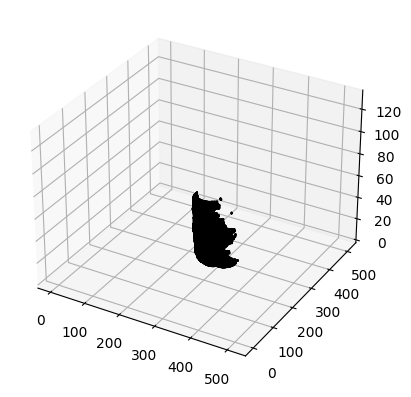

In [ ]:

# читаем содержимое 1 архива gz и отображаем картинки

with gzip.open(dict_mask_fr[example], 'rb') as f_in:
  img = nib.load(dict_mask_fr[example])# читаем архив и файл из него
  data = img.get_data()

# отображение данных в формате 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(data, edgecolor='k')
plt.show()

In [ ]:
data.shape

(512, 512, 134)

In [ ]:
print(data.min())
print(data.max())

0
1
